# **Fashion MNIST Classification - Introducing Neural Networks**

In [40]:
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
sns.set()
warnings.filterwarnings('ignore')

I will continue with Fashion MNIST dataset. This time, I will examine the effect of different Optimizers used for Gradient Descent in Neural Networks.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

Let us create a custom Neural Network:
1. Each unit in a Neural Network is called a **"Neuron"**.
2. The **Input Layer** is the flattened vector of MNIST image. The vector dimension is **(28*28,1)**. Thus, there are **784 Input Neurons**.
3. There are two hidden layers. The first hidden layer consists of **128 Neurons**, While the second hidden layer consists of **64 Neurons**.
4. Finally, the **Output Layer** is a vector with shape of our desired output, which is **(10,1)**.
5. The activation function for Neurons in hidden layers is **ReLU**, while the output activation function, which is expected to represent probabilities of classes, is **softmax**.

In [3]:
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(28 * 28,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model

I will be comparing the performance of 6 Optimizers under each mode of the three modes of computing and updating gradients of weight matrices in my NN, based on the number of training examples used per update. The three modes are:
1. **Batch Gradient Descent (BGD)**: This is theoretically THE most correct, yet a relatively much slower way of computing and updating gradients. At each epoch (1 epoch = 1 pass over the entire data), BGD uses the entire dataset to calculate 1 gradient update.
2. **Stochastic Gradient Descent (SGD)**: This method updates the gradient at each datapoint in 1 epoch. Thus, gradient gets updated $N$ times in 1 epoch.
3. **Mini-Batch Gradient Descent (Mini-batch GD)**: In this method, a batch size B is fixed. The data is then divided into B sized subsets called Mini-batches. In each epoch, Mini-batch GD uses each mini-batch together to calculate 1 gradient update. Thus, for a data with $N$ datapoints, there are $N/B$ gradient updates in 1 epoch.

For each of these modes, I am comparing the performance of 6 Optimizers:

a. **Vanilla Gradient Descent (GD)**: The basic approach of Gradient Descent.

b. **Momentum Based GD (MBGD)**: Introduces a momentum term, which accumulates previous gradients over epochs, providing faster convergence, but is prone to oscillations around the optimal solution.

c. **Nesterov Accelarated GD (NAGD)**: A variant of MBGD, in which a "look-ahead" gradient is calculated at a point, which is ahead of the current point. Looking ahead helps in quicker course corrections relative to MBGD and hence, smaller oscillations around the optimal solution.

d. **Adaptive Gradient (Adagrad)**: This method decays the learning rate for each parameter in proportion to the *cumulative sum of previous squared gradients*. This is helpful for sparse data. In some cases, an aggressive decay in learning rates can cause certain parameters to receive very small updates.

e. **Root Mean Square Propogation (RMSProp)**: Helps to solve the problem of diminishing learning rates of Adagrad, by using *exponentially decaying average of squared gradients* instead of cumulative sum of previous squared gradients.

f. **Adaptive Moment (Adam)**: A combined approach of Adagrad and RMSProp
____
Let us see each mode one by one..

# Batch Gradient Descent (BGD)

The following optimizers are considered.

In [9]:
optimizers1 = {
    "GD": keras.optimizers.SGD(),
    "MBGD": keras.optimizers.SGD(momentum=0.9),
    "NAGD": keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "Adagrad": keras.optimizers.Adagrad(),
    "RMSProp": keras.optimizers.RMSprop(momentum=0.9),
    "Adam": keras.optimizers.Adam(),
}

Let us check the performance of each of these Optimizers for a fixed number of epochs. In this case , **epochs = 200**.

In [10]:
results1 = []

history_dict1 = {}

for name,optimizer in optimizers1.items():
    print(f"====================={name}=========================")
    model1 = create_model()
    model1.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    history1 = model1.fit(X_train, 
                        y_train, 
                        batch_size=X_train.shape[0], 
                        epochs=200, 
                        verbose=0, 
                        validation_split=0.2, 
                        validation_batch_size=round(X_train.shape[0]*0.2))
    fitting_time = time.time() - start_time
    
    history_dict1[name] = history1.history

    print("**************************")
    print("Training metrics:")
    train_acc = model1.evaluate(X_train, y_train, verbose=1)[1]
    print("**************************")
    print("Test metrics:")
    test_acc = model1.evaluate(X_test, y_test, verbose=1)[1]
    print("**************************")
    y_test_pred = model1.predict(X_test,verbose=0)
    cross_entropy = log_loss(y_test, y_test_pred)
    
    results1.append({
        'Optimizer': name,
        'Fitting Time (s)': fitting_time,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc,
        'Cross Entropy': cross_entropy
    })

=====================GD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - accuracy: 0.7121 - loss: 0.9929
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7075 - loss: 1.0030
**************************
=====================MBGD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.8323 - loss: 0.4957
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8196 - loss: 0.5175
**************************
=====================NAGD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8297 - loss: 0.5010
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8232 - loss: 0.5222
**************************
=====================Adagrad================

In [58]:
results1_df = pd.DataFrame(results1)
results1_df

,Optimizer,Fitting Time (s),Training Accuracy,Testing Accuracy,Cross Entropy
0,GD,51.970914,0.713300,0.7067,1.006630
1,MBGD,52.871996,0.830067,0.8171,0.525259
2,NAGD,52.853984,0.829183,0.8149,0.530082
3,Adagrad,53.393052,0.507783,0.4947,1.763846
4,RMSProp,55.013064,0.891933,0.8602,0.402457
5,Adam,53.520215,0.887333,0.8694,0.374445
6,GD,382.353323,0.884267,0.8628,0.393712


In [76]:
pd.DataFrame(history1.history)

,accuracy,loss,val_accuracy,val_loss
0,0.086938,2.373281,0.210500,2.116434
1,0.202250,2.120395,0.394000,1.976585
2,0.386542,1.979727,0.448333,1.849905
3,0.448021,1.853629,0.514000,1.718303
4,0.511354,1.723971,0.569833,1.588047
...,...,...,...,...
195,0.887438,0.320267,0.873917,0.363248
196,0.888354,0.319986,0.874333,0.360994
197,0.889063,0.316895,0.875333,0.358180
198,0.890604,0.314410,0.875250,0.357539


In [78]:
pd.DataFrame(history_dict1)

,GD,MBGD,NAGD,Adagrad,RMSProp,Adam
accuracy,"[0.06266666948795319, 0.07710416615009308, 0.0...","[0.12054166942834854, 0.13177083432674408, 0.1...","[0.09652083367109299, 0.10858333110809326, 0.1...","[0.09835416823625565, 0.09858333319425583, 0.0...","[0.19629167020320892, 0.3948749899864197, 0.57...","[0.08693750202655792, 0.20225000381469727, 0.3..."
loss,"[2.4378316402435303, 2.405416488647461, 2.3764...","[2.496093511581421, 2.440706491470337, 2.35438...","[2.3604328632354736, 2.3355720043182373, 2.302...","[2.4050490856170654, 2.3944857120513916, 2.384...","[2.2872869968414307, 1.912318468093872, 1.4824...","[2.3732805252075195, 2.1203954219818115, 1.979..."
val_accuracy,"[0.07824999839067459, 0.09458333253860474, 0.1...","[0.1368333399295807, 0.16300000250339508, 0.20...","[0.11150000244379044, 0.12925000488758087, 0.1...","[0.09733333438634872, 0.09791667014360428, 0.0...","[0.3918333351612091, 0.5805000066757202, 0.555...","[0.21050000190734863, 0.39399999380111694, 0.4..."
val_loss,"[2.407529830932617, 2.378054618835449, 2.35148...","[2.4385290145874023, 2.3513693809509277, 2.264...","[2.335444927215576, 2.3023226261138916, 2.2644...","[2.3947246074676514, 2.384636402130127, 2.3750...","[1.9102983474731445, 1.4671865701675415, 1.253...","[2.116434335708618, 1.9765849113464355, 1.8499..."


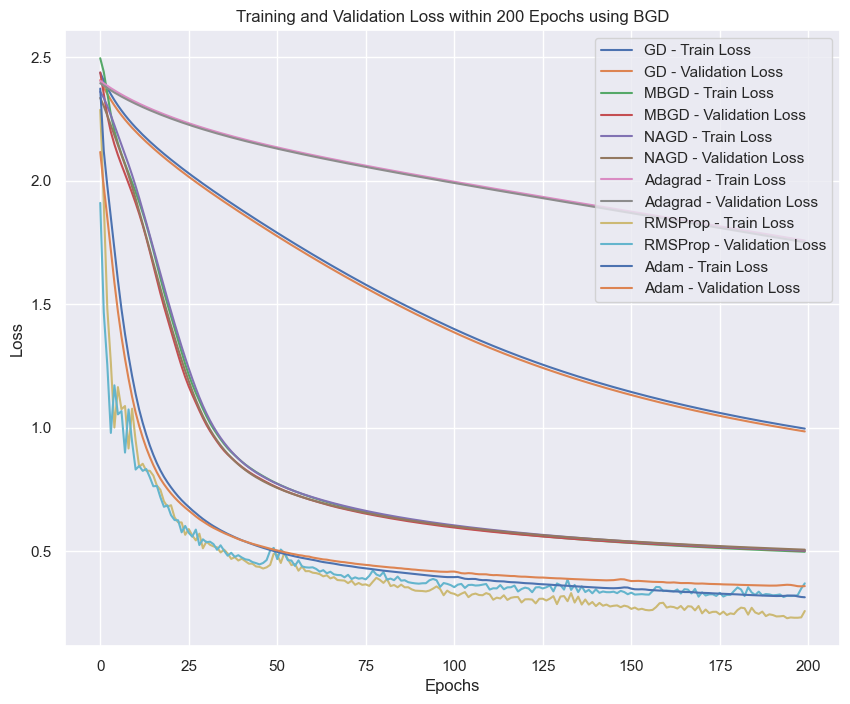

In [84]:
plt.figure(figsize=(10, 8))

for name, history in history_dict1.items():
    plt.plot(history['loss'], label=f'{name} - Train Loss')
    plt.plot(history['val_loss'], label=f'{name} - Validation Loss')
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss within 200 Epochs using BGD')
plt.legend()
plt.show()

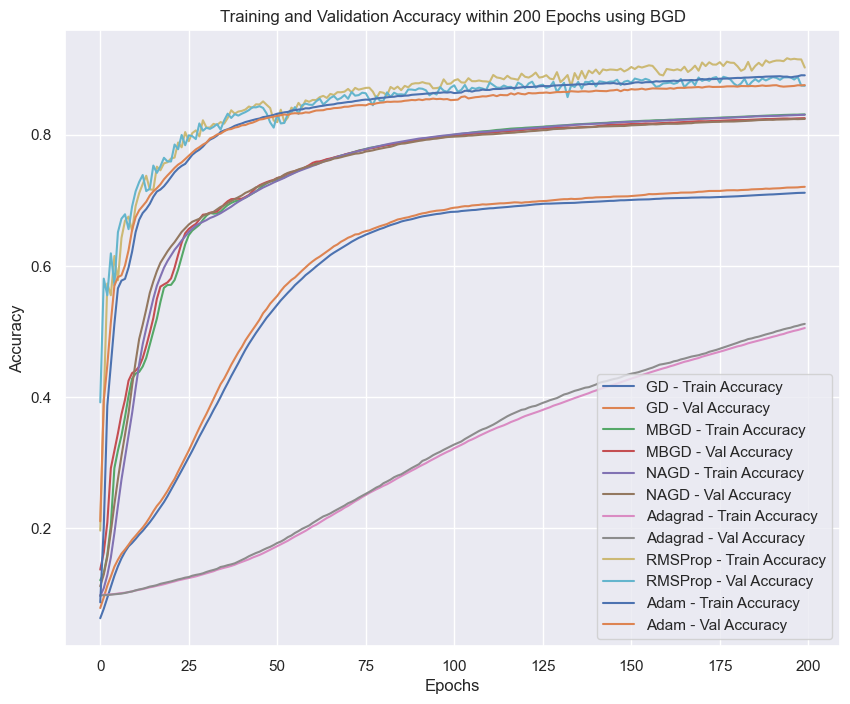

In [83]:
plt.figure(figsize=(10, 8))

for name, history in history_dict1.items():
    plt.plot(history['accuracy'], label=f"{name} - Train Accuracy")
    plt.plot(history['val_accuracy'], label=f"{name} - Val Accuracy")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy within 200 Epochs using BGD')
plt.legend()
plt.show()

**Observations**:
1. In one epoch, BGD uses the entire data to calculate 1 gradient update. The *batch_size* parameter in model.fit method determines the number of datapoints to consider for 1 gradient update. Hence, for BGD, the batch_size will be the number of datapoints present in the training data. Thus, **batch_size = X_train.shape[0]**

2. For all the cases of BGD, the optimizers have to go over the entire data to make just 1 update to the current gradient i.e. **1 gradient update per epoch**. Hence, we need to set a higher value of epochs to achieve better results (In this case, **epochs = 200**).

3. For a fixed 200 epochs, the order of speed of convergence for different optimizers under BGD mode is as follows: **(RMSProp, Adam) > (MBGD, NAGD) > GD > Adagrad**

4. The oscillating nature of MBGD and RMSProp is observed.

5. **Why Adgrad performs poor?** This could be because of the aggressive decay of learning rates for non-sparse parameters.

6. For all the cases, the training and testing accuracies are very close to each other, indicating that the **optimizers don't seem to overfit**.

# Stochastic Gradient Descent (SGD)

In [35]:
optimizers2 = {
    "GD": keras.optimizers.SGD(),
    "MBGD": keras.optimizers.SGD(momentum=0.9),
    "NAGD": keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "Adagrad": keras.optimizers.Adagrad(),
    "RMSProp": keras.optimizers.RMSprop(momentum=0.9),
    "Adam": keras.optimizers.Adam(),
}

In [36]:
results2 = []

history_dict2 = {}

for name,optimizer in optimizers2.items():
    print(f"====================={name}=========================")
    model2 = create_model()
    model2.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    history2 = model2.fit(X_train, 
                        y_train, 
                        batch_size=1, 
                        epochs=5, 
                        verbose=1, 
                        validation_split=0.2, 
                        validation_batch_size=1)
    fitting_time = time.time() - start_time
    
    history_dict2[name] = history2.history

    print("**************************")
    print("Training metrics:")
    train_acc = model2.evaluate(X_train, y_train, verbose=1)[1]
    print("**************************")
    print("Test metrics:")
    test_acc = model2.evaluate(X_test, y_test, verbose=1)[1]
    print("**************************")
    y_test_pred = model2.predict(X_test,verbose=0)
    cross_entropy = log_loss(y_test, y_test_pred)
    
    results2.append({
        'Optimizer': name,
        'Fitting Time (s)': fitting_time,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc,
        'Cross Entropy': cross_entropy
    })

=====================GD=========================
Epoch 1/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.7561 - loss: 0.6646 - val_accuracy: 0.8356 - val_loss: 0.4387
Epoch 2/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.8432 - loss: 0.4181 - val_accuracy: 0.8547 - val_loss: 0.4019
Epoch 3/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.8600 - loss: 0.3732 - val_accuracy: 0.8670 - val_loss: 0.3672
Epoch 4/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.8698 - loss: 0.3517 - val_accuracy: 0.8653 - val_loss: 0.3745
Epoch 5/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.8769 - loss: 0.3352 - val_accuracy: 0.8741 - val_loss: 0.3631
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8863 - loss: 0.3054
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8660 - loss: 0.3801
**************************
=====================MBGD=

In [59]:
results2_df = pd.DataFrame(results2)
results2_df

,Optimizer,Fitting Time (s),Training Accuracy,Testing Accuracy,Cross Entropy
6,GD,382.353323,0.884267,0.8628,0.393712
7,MBGD,295.663162,0.100000,0.1000,2.320839
8,NAGD,287.036369,0.100000,0.1000,2.324862
9,Adagrad,308.084176,0.840583,0.8274,0.499498
10,RMSProp,363.012830,0.505350,0.5024,1.783021
11,Adam,327.658999,0.867517,0.8546,0.458231


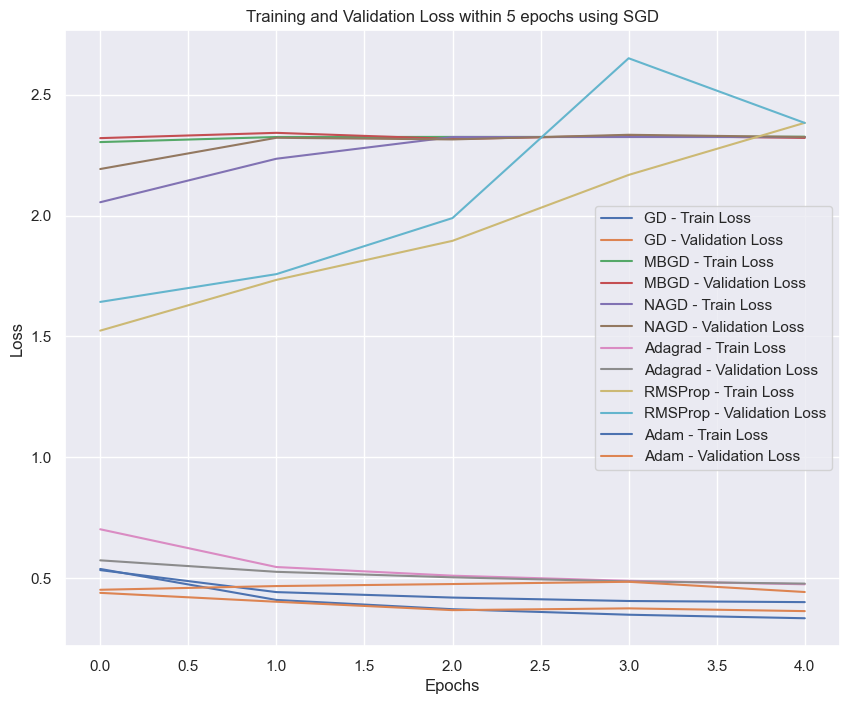

In [82]:
plt.figure(figsize=(10, 8))

for name, history in history_dict2.items():
    plt.plot(history['loss'], label=f'{name} - Train Loss')
    plt.plot(history['val_loss'], label=f'{name} - Validation Loss')
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss within 5 epochs using SGD')
plt.legend()
plt.show()

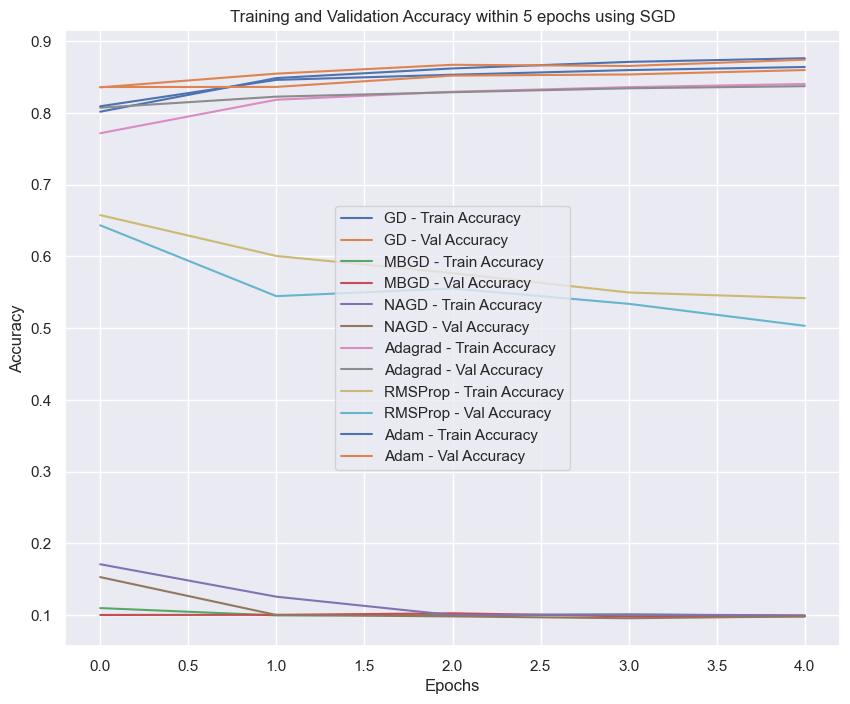

In [81]:
plt.figure(figsize=(10, 8))

for name, history in history_dict2.items():
    plt.plot(history['accuracy'], label=f'{name} - Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} - Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy within 5 epochs using SGD')
plt.legend()
plt.show()

**Observations**:
1. SGD is considered as an extreme approximation of Batch GD, since in 1 epoch, we are performing gradient update **at each datapoint**. Thus, **batch_size = 1**.

2. Due to more frequent gradient updates, SGD achieves a much faster convergence in lesser number of epochs (In this case, **epochs = 5**).

3. For a fixed 5 epochs, GD, Adagrad and Adam seem to work really well under SGD. However, for the rest, SGD actually worsens the performance. This is because SGD  introduces more noise, which can be beneficial for generalization and escaping local minima, but can lead to **unstable convergence** for some optimizers.

4. Low training and testing accuracies for MBGD, NAGD and RMSProp indicate **underfitting**.

# Mini-Batch Gradient Descent (Mini-batch GD)

In [67]:
optimizers3 = {
    "GD": keras.optimizers.SGD(),
    "MBGD": keras.optimizers.SGD(momentum=0.9),
    "NAGD": keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "Adagrad": keras.optimizers.Adagrad(),
    "RMSProp": keras.optimizers.RMSprop(momentum=0.9),
    "Adam": keras.optimizers.Adam(),
}

In [68]:
results3 = []

history_dict3 = {}

for name,optimizer in optimizers3.items():
    print(f"====================={name}=========================")
    model3 = create_model()
    model3.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    start_time = time.time()
    history3 = model3.fit(X_train, 
                        y_train, 
                        batch_size=100, 
                        epochs=20, 
                        verbose=0, 
                        validation_split=0.2, 
                        validation_batch_size=1)
    fitting_time = time.time() - start_time
    
    history_dict3[name] = history3.history

    print("**************************")
    print("Training metrics:")
    train_acc = model3.evaluate(X_train, y_train, verbose=1)[1]
    print("**************************")
    print("Test metrics:")
    test_acc = model3.evaluate(X_test, y_test, verbose=1)[1]
    print("**************************")
    y_test_pred = model3.predict(X_test,verbose=0)
    cross_entropy = log_loss(y_test, y_test_pred)
    
    results3.append({
        'Optimizer': name,
        'Fitting Time (s)': fitting_time,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc,
        'Cross Entropy': cross_entropy
    })

=====================GD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.8725 - loss: 0.3662
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8600 - loss: 0.4090
**************************
=====================MBGD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9223 - loss: 0.2142
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3527
**************************
=====================NAGD=========================
**************************
Training metrics:
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9303 - loss: 0.1907
**************************
Test metrics:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8864 - loss: 0.3349
**************************
=====================Adagrad======================

In [71]:
results3_df = pd.DataFrame(results3)
results3_df

,Optimizer,Fitting Time (s),Training Accuracy,Testing Accuracy,Cross Entropy
0,GD,306.528644,0.870117,0.8544,0.417287
1,MBGD,317.637275,0.914433,0.8776,0.347967
2,NAGD,334.270679,0.923083,0.8847,0.334881
3,Adagrad,405.351660,0.827483,0.8166,0.536183
4,RMSProp,340.288922,0.885833,0.8606,0.512605
5,Adam,302.603307,0.926867,0.8828,0.373738


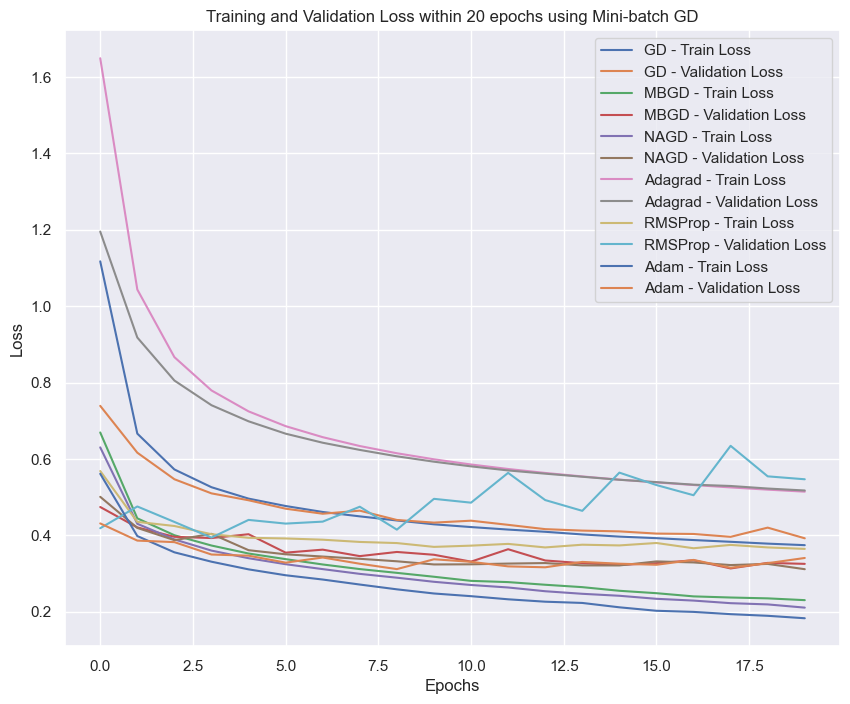

In [80]:
plt.figure(figsize=(10, 8))

for name, history in history_dict3.items():
    plt.plot(history['loss'], label=f'{name} - Train Loss')
    plt.plot(history['val_loss'], label=f'{name} - Validation Loss')
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss within 20 epochs using Mini-batch GD')
plt.legend()
plt.show()

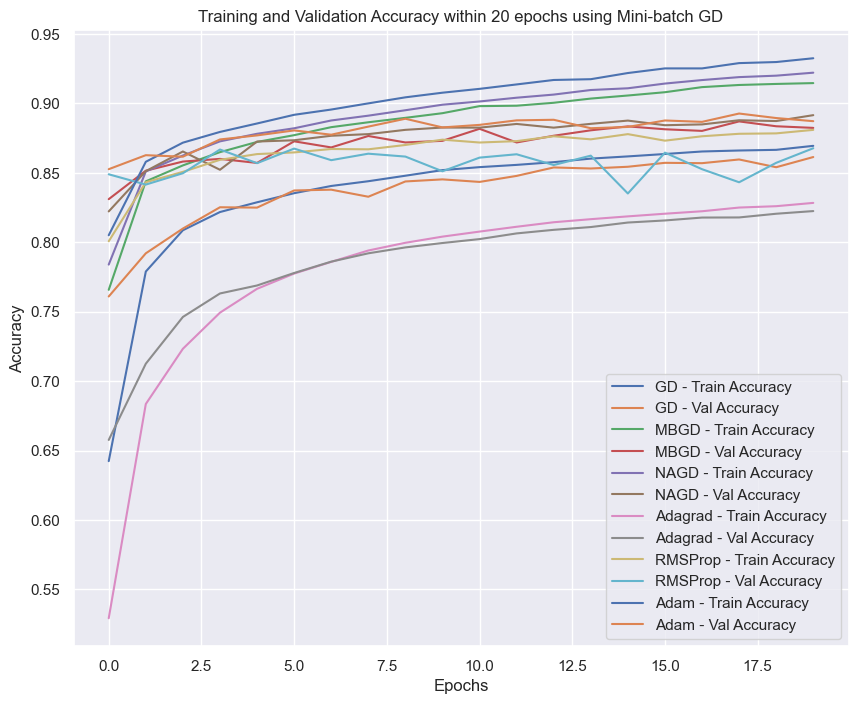

In [79]:
plt.figure(figsize=(10, 8))

for name, history in history_dict3.items():
    plt.plot(history['accuracy'], label=f'{name} - Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} - Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy within 20 epochs using Mini-batch GD')
plt.legend()
plt.show()

**Observations**:
1. Mini-batch GD is considered as an compromise between BGD and SGD, since in one epoch, we are making gradient updates for a certain number of sub-sets (or mini-batches) of datapoints. In this case, **batch_size = 100**.

2. Thus, convergence is relatively stable than SGD, and relatively faster than BGD, achieved with much lesser number of epochs relative to BGD(**epochs = 20**).

3. The *batch_size* parameter is crucial in Mini-batch GD. Very **high values of batch size cause overfitting**, which can be observed in our case, especially with MBGD, NAGD and Adam.

# Comparison of 3 modes

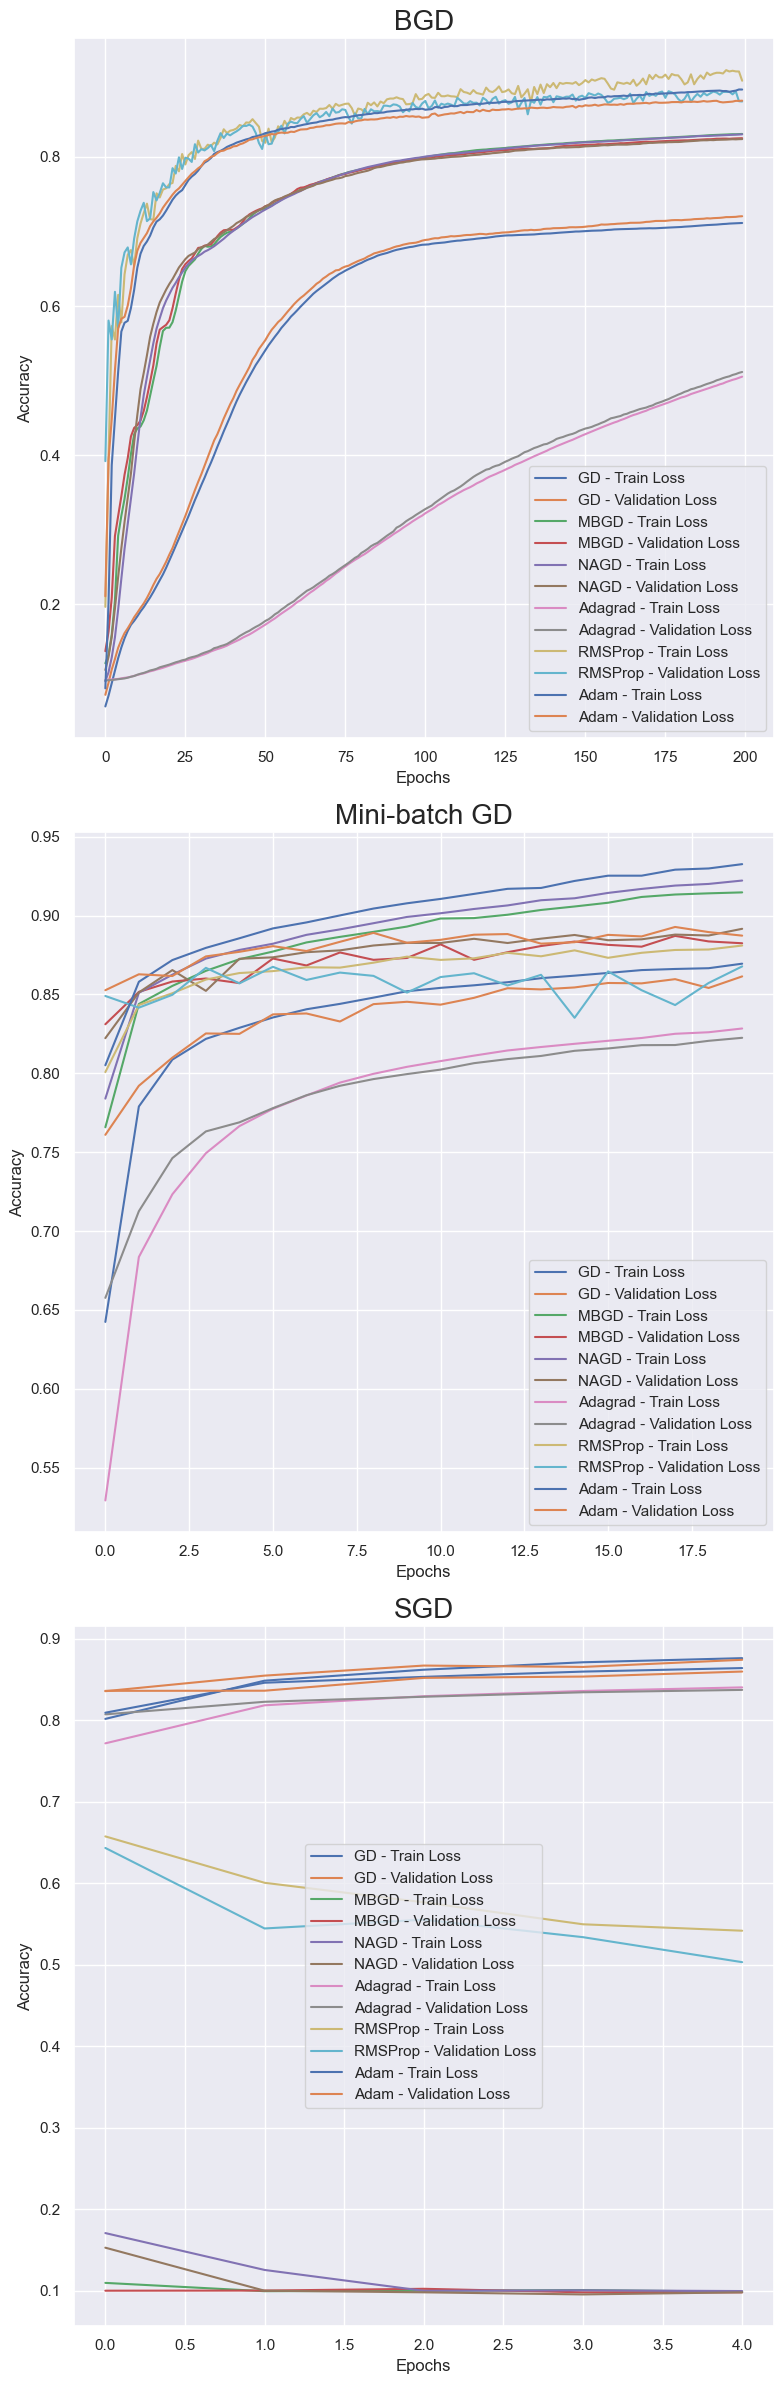

In [104]:
history_dictionaries = [history_dict1,history_dict3,history_dict2]
titles = ['BGD', 'Mini-batch GD', 'SGD']
         
plt.figure(figsize=(8,24))
for i,history_dict,title in zip(range(3),history_dictionaries,titles):
    plt.subplot(3,1,i+1)
    plt.title(title,fontsize=20)
    for name, history in history_dict.items():
        plt.plot(history['accuracy'], label=f'{name} - Train Loss')
        plt.plot(history['val_accuracy'], label=f'{name} - Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()